In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
data=pd.read_csv('startup_funding.csv')

In [3]:
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


## Question 1

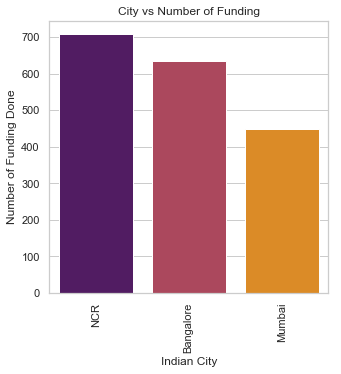

In [37]:
## Cleaning the City Feature
data['CityLocation'].dropna(inplace=True)
def separateCity(city):
    return city.split('/')[0].strip()
data['CityLocation']=data['CityLocation'].apply(separateCity)
data['CityLocation'].replace("Delhi","New Delhi",inplace=True)
data['CityLocation'].replace("bangalore","Bangalore",inplace=True)
## Labelling the New Delhi,Gurgaon,Noida to NCR
data['CityLocation'].replace("New Delhi","NCR",inplace=True)
data['CityLocation'].replace('Gurgaon','NCR',inplace=True)
data['CityLocation'].replace('Noida','NCR',inplace=True)
## Ploting the City vs Number of funding done 
plt.subplots(figsize=(5,5))
sns.set(style="whitegrid")
sns.countplot(data['CityLocation'],palette='inferno',order=data['CityLocation'].value_counts().index[0:3])
plt.xticks(rotation=90)
plt.title('City vs Number of Funding')
plt.ylabel("Number of Funding Done")
plt.xlabel("Indian City")
plt.show()

## Question 2 

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


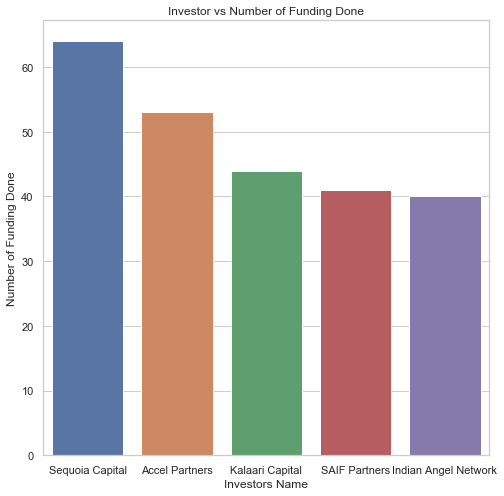

In [135]:
## Creating the dictionary of Investor and number of funding done
def createDictionary(array):
    dictionary={}
    for i in array:
        if ',' not in i:
            if i.strip() in dictionary:
                dictionary[i.strip()]=dictionary.get(i.strip())+1
            else:
                dictionary[i.strip()]=1   
        else:
            string=i.strip().split(',')
            for j in string:
                if j.strip() in dictionary:
                    dictionary[j.strip()]=dictionary.get(j.strip())+1
                else:
                    dictionary[j.strip()]=1
    return dictionary 
## Creating the dictionary
dictionary=createDictionary(data['InvestorsName'])
dataf=pd.DataFrame(list(dictionary.values()),list(dictionary.keys()))
## Sorting the values in descending order
dataf=dataf.sort_values(by=[0],ascending=False)
# Getting the top 5 values of Investor done max number of times
X=dataf.index[0:5]
Y=dataf.values[0:5]
Y=Y.reshape(5)
## Printing the Top 5 Investors
for i in range(5):
    print(X[i],Y[i])
## Ploting the City vs Number of funding done 
plt.subplots(figsize=(8,8))
plt.xlabel("Investors Name")
plt.ylabel("Number of Funding Done")
plt.title("Investor vs Number of Funding Done")
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x=X, y=Y, data=tips)

## Question 3

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


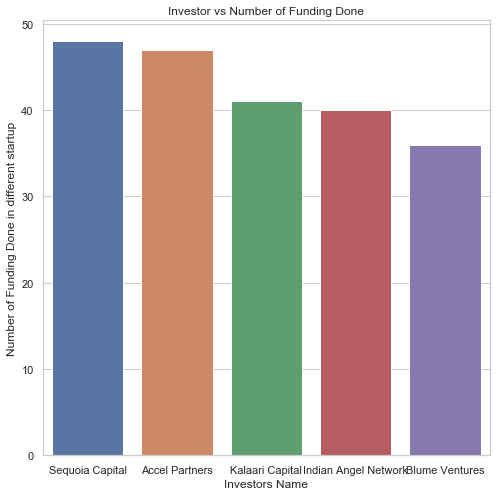

In [134]:
# Droping the Investors Name
## Deleting the NAN AND INF VALUE
data.replace([np.inf, -np.inf], np.nan,inplace=True)
data.dropna(subset=["InvestorsName"], how="all",inplace=True)
# Correcting the important start up name
data['StartupName'].replace('Olacabs','Ola',inplace=True)
data['StartupName'].replace('Ola Cabs','Ola',inplace=True)
data['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
data['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
data['StartupName'].replace('Oyorooms','Oyo',inplace=True)
data['StartupName'].replace('OyoRooms','Oyo',inplace=True)
data['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
data['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
# Creating a dictionary of Investors and company he invested
def createDictionary(investor_list,company_list):
    dictionary={}
    for i in range(len(investor_list)):
        company_name=company_list[i]
        investor_names=investor_list[i]
        if ',' not in investor_names:
            if investor_names.strip() in dictionary:
                company_set=dictionary.get(investor_names.strip())
                company_set.add(company_name)
                dictionary[investor_names.strip()]=company_set
            else:
                company_set=set()
                company_set.add(company_name)
                dictionary[investor_names.strip()]=company_set
        else:
            investors=investor_names.strip().split(',')
            for j in investors:
                if j.strip() in dictionary:
                    company_set=dictionary.get(j.strip())
                    company_set.add(company_name)
                    dictionary[j.strip()]=company_set
                else:
                    company_set=set()
                    company_set.add(company_name)
                    dictionary[j.strip()]=company_set
    return dictionary 

## Creating the dictionary
dictionary=createDictionary(data['InvestorsName'].values,data['StartupName'].values)   
## Creating dictionary with investors name and length of set
unique_investor_company={}
for key in dictionary.keys():
    values=dictionary.get(key)
    unique_investor_company[key]=len(values)
del unique_investor_company[""]    
# Creating a dataframe of keys and values
dataf=pd.DataFrame(list(unique_investor_company.values()),list(unique_investor_company.keys()))
## Sorting the values in descending order
dataf=dataf.sort_values(by=[0],ascending=False)
# Getting the top 5 values of Investor done max number of times in different startup
X=dataf.index[0:5]
Y=dataf.values[0:5]
Y=Y.reshape(5)
## Printing the Top 5 Investors
for i in range(5):
    print(X[i],Y[i])
## Ploting the City vs Number of funding done 
plt.subplots(figsize=(8,8))
plt.xlabel("Investors Name")
plt.ylabel("Number of Funding Done in different startup")
plt.title("Investor vs Number of Funding Done")
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x=X, y=Y, data=tips)

# Question 4

Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Group of Angel Investors 14


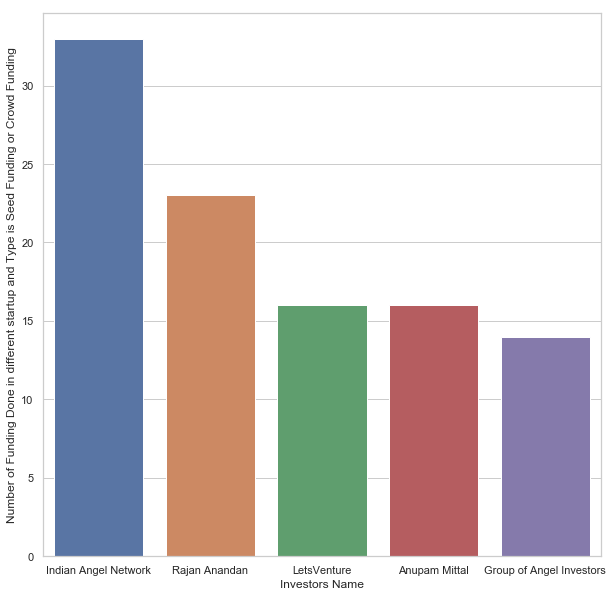

In [145]:
# Droping the Investors Name and Investment Type
## Deleting the NAN AND INF VALUE
data.replace([np.inf, -np.inf], np.nan,inplace=True)
data.dropna(subset=["InvestorsName","InvestmentType"], how="all",inplace=True)
# Correcting the important start up name
data['StartupName'].replace('Olacabs','Ola',inplace=True)
data['StartupName'].replace('Ola Cabs','Ola',inplace=True)
data['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
data['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
data['StartupName'].replace('Oyorooms','Oyo',inplace=True)
data['StartupName'].replace('OyoRooms','Oyo',inplace=True)
data['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
data['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
# Correcting the Investment Type in dataset
data['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
data['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
data['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
# Creating a dictionary of Investors and company he invested
def createDictionary(investor_list,company_list,investment_type_list):
    dictionary={}
    for i in range(len(investor_list)):
        company_name=company_list[i]
        investor_names=investor_list[i]
        investment_type=investment_type_list[i]
        if investment_type == 'Seed Funding' or investment_type == 'Crowd Funding':
            if ',' not in investor_names:
                if investor_names.strip() in dictionary:
                    company_set=dictionary.get(investor_names.strip())
                    company_set.add(company_name)
                    dictionary[investor_names.strip()]=company_set
                else:
                    company_set=set()
                    company_set.add(company_name)
                    dictionary[investor_names.strip()]=company_set
            else:
                investors=investor_names.strip().split(',')
                for j in investors:
                    if j.strip() in dictionary:
                        company_set=dictionary.get(j.strip())
                        company_set.add(company_name)
                        dictionary[j.strip()]=company_set
                    else:
                        company_set=set()
                        company_set.add(company_name)
                        dictionary[j.strip()]=company_set
    return dictionary 
dictionary=createDictionary(data['InvestorsName'].values,data['StartupName'].values,data['InvestmentType'].values)   
## Creating dictionary with investors name and length of set
unique_investor_company={}
for key in dictionary.keys():
    values=dictionary.get(key)
    unique_investor_company[key]=len(values)
del unique_investor_company[""] 
del unique_investor_company["Undisclosed investors"] 
del unique_investor_company["Undisclosed Investors"]
# Creating a dataframe of keys and values
dataf=pd.DataFrame(list(unique_investor_company.values()),list(unique_investor_company.keys()))
## Sorting the values in descending order
dataf=dataf.sort_values(by=[0],ascending=False)
# Getting the top 5 values of Investor done max number of times in different startup
X=dataf.index[0:5]
Y=dataf.values[0:5]
Y=Y.reshape(5)
## Printing the Top 5 Investors
for i in range(5):
    print(X[i],Y[i])
## Ploting the City vs Number of funding done 
plt.subplots(figsize=(10,10))
plt.xlabel("Investors Name")
plt.ylabel("Number of Funding Done in different startup and Type is Seed Funding or Crowd Funding")
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x=X, y=Y, data=tips)

# Question 5 

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


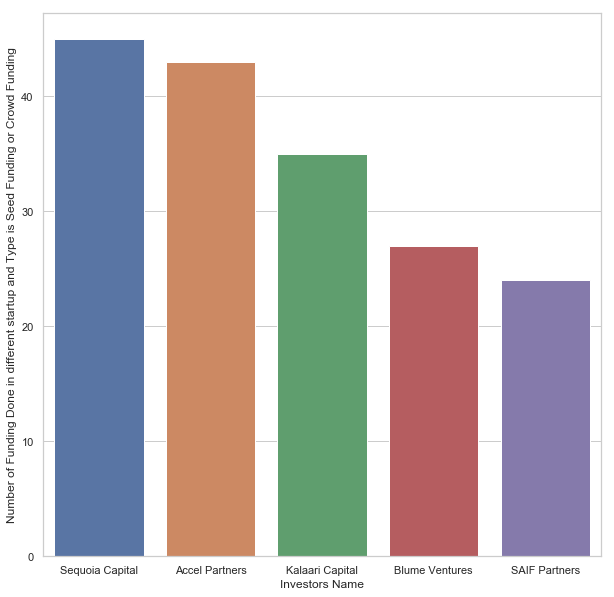

In [146]:
# Droping the Investors Name and Investment Type
## Deleting the NAN AND INF VALUE
data.replace([np.inf, -np.inf], np.nan,inplace=True)
data.dropna(subset=["InvestorsName","InvestmentType"], how="all",inplace=True)
# Correcting the important start up name
data['StartupName'].replace('Olacabs','Ola',inplace=True)
data['StartupName'].replace('Ola Cabs','Ola',inplace=True)
data['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
data['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
data['StartupName'].replace('Oyorooms','Oyo',inplace=True)
data['StartupName'].replace('OyoRooms','Oyo',inplace=True)
data['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
data['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
# Correcting the Investment Type in dataset
data['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
data['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
data['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
# Creating a dictionary of Investors and company he invested
def createDictionary(investor_list,company_list,investment_type_list):
    dictionary={}
    for i in range(len(investor_list)):
        company_name=company_list[i]
        investor_names=investor_list[i]
        investment_type=investment_type_list[i]
        if investment_type == 'Private Equity':
            if ',' not in investor_names:
                if investor_names.strip() in dictionary:
                    company_set=dictionary.get(investor_names.strip())
                    company_set.add(company_name)
                    dictionary[investor_names.strip()]=company_set
                else:
                    company_set=set()
                    company_set.add(company_name)
                    dictionary[investor_names.strip()]=company_set
            else:
                investors=investor_names.strip().split(',')
                for j in investors:
                    if j.strip() in dictionary:
                        company_set=dictionary.get(j.strip())
                        company_set.add(company_name)
                        dictionary[j.strip()]=company_set
                    else:
                        company_set=set()
                        company_set.add(company_name)
                        dictionary[j.strip()]=company_set
    return dictionary 
dictionary=createDictionary(data['InvestorsName'].values,data['StartupName'].values,data['InvestmentType'].values)   
## Creating dictionary with investors name and length of set
unique_investor_company={}
for key in dictionary.keys():
    values=dictionary.get(key)
    unique_investor_company[key]=len(values)
del unique_investor_company[""] 
del unique_investor_company["Undisclosed investors"] 
del unique_investor_company["Undisclosed Investors"]
# Creating a dataframe of keys and values
dataf=pd.DataFrame(list(unique_investor_company.values()),list(unique_investor_company.keys()))
## Sorting the values in descending order
dataf=dataf.sort_values(by=[0],ascending=False)
# Getting the top 5 values of Investor done max number of times in different startup
X=dataf.index[0:5]
Y=dataf.values[0:5]
Y=Y.reshape(5)
## Printing the Top 5 Investors
for i in range(5):
    print(X[i],Y[i])
## Ploting the City vs Number of funding done 
plt.subplots(figsize=(10,10))
plt.xlabel("Investors Name")
plt.ylabel("Number of Funding Done in different startup and Type is Seed Funding or Crowd Funding")
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x=X, y=Y, data=tips)